In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch
from torch import nn

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
fetu1=(np.random.random(30)-0.5)*12
fetu2=(np.random.random(30)-0.5)*12
features=np.stack((fetu1,fetu2),axis=0).T
labels=20*np.sin(np.sqrt(fetu1 ** 2 + fetu2 ** 2))
features=torch.Tensor(features)
labels=torch.Tensor(labels)
new_shape = (len(labels), 1)
labels = labels.view(new_shape)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'z')

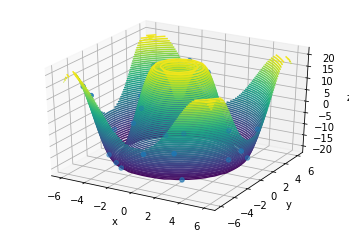

In [ ]:
def f(x, y):
    return 20*np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z,50)
ax.scatter(fetu1, fetu2, labels)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
features.shape,labels.shape

(torch.Size([30, 2]), torch.Size([30, 1]))

In [ ]:
##  定义model
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,1)
          
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits



In [ ]:

class CustomImageDataset(Dataset):
    def __init__(self, features, labels, transform=None, target_transform=None):
        self.feature=features
        self.label=labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        data=self.feature[idx,:]
        label=self.label[idx]

        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

In [ ]:
training_data=CustomImageDataset(features,labels)
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    loss_lst=[]

    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        
        

        # for name  in model.parameters():
        #     print(name)

        # print("------------------------------")

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    ## 计算出整个数据的loss
    with torch.no_grad():
        out=model(features)
        final_loss=loss_fn(out,labels)
        loss_lst.append(final_loss.item())
        print(f'epoch Loss: {final_loss.item()}')
        
    return loss_lst

In [ ]:
loss_fn = nn.MSELoss()
model = NeuralNetwork().to(device)
print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [ ]:
epochs = 400
loss_lst=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss_lst+=train(train_dataloader, model, loss_fn, optimizer)
    print('\n')

Epoch 1
-------------------------------
loss: 118.001663  [    0/   30]
loss: 94.073540  [   10/   30]
loss: 163.244690  [   20/   30]
epoch Loss: 116.56736755371094


Epoch 2
-------------------------------
loss: 94.670425  [    0/   30]
loss: 137.381958  [   10/   30]
loss: 124.684959  [   20/   30]
epoch Loss: 115.28229522705078


Epoch 3
-------------------------------
loss: 96.905991  [    0/   30]
loss: 106.715965  [   10/   30]
loss: 169.741135  [   20/   30]
epoch Loss: 116.06241607666016


Epoch 4
-------------------------------
loss: 143.601852  [    0/   30]
loss: 109.207985  [   10/   30]
loss: 116.809181  [   20/   30]
epoch Loss: 115.28414154052734


Epoch 5
-------------------------------
loss: 106.976089  [    0/   30]
loss: 141.846085  [   10/   30]
loss: 111.086044  [   20/   30]
epoch Loss: 112.64469909667969


Epoch 6
-------------------------------
loss: 67.195045  [    0/   30]
loss: 128.212082  [   10/   30]
loss: 157.390549  [   20/   30]
epoch Loss: 111.8198623

In [ ]:
'''
layer_num  2
nu_num 100
after 100 epoch loss=134.0238494873047
after 2000 epoch loss=29.027944564819336
2000个epoch跑出来还差那么多 说明model拟合能力太弱


layer_num  3
nu_num [100,50]
after 100 epoch loss=118.21805572509766
after 500 epoch loss=16.61733627319336
after 1000 epoch loss=0.19051554799079895

## 深刻的说明了层数越多 拟合的能力越强


'''

'\nlayer_num  2\nnu_num 10\nafter 100 epoch loss=0.4707297086715698\nafter 1000 epoch loss=0.3715347349643707\n\nlayer_num  2\nnu_num 50\nafter 100 epoch loss=0.37508824467658997\nafter 1000 epoch loss=0.2815173864364624\n'

In [ ]:
len(loss_lst)

1000

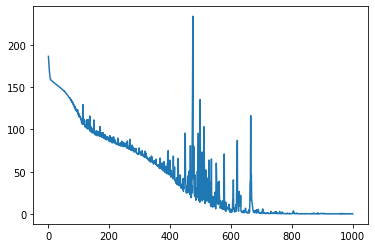

In [ ]:
plt.plot(np.arange(len(loss_lst))+1,loss_lst)
plt.show()

In [ ]:
out=model(features)
final_loss=loss_fn(out,labels)
print(final_loss.item())

0.19051554799079895


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'z')

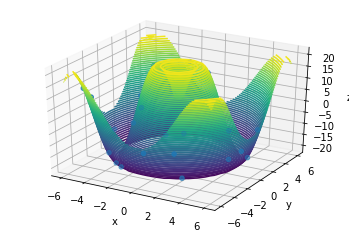

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z,50)
ax.scatter(fetu1, fetu2, out.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')